In [9]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df= pd.read_csv('Dataset/phishing_site_urls.csv')

In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [12]:
df.shape

(549346, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [14]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [16]:
df.Label.value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

In [ ]:
! pip install nltk

In [18]:
from nltk.tokenize import RegexpTokenizer

In [19]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [20]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [21]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [22]:
df['text_tokenized']  =df.URL.map(lambda t:tokenizer.tokenize(t))

In [23]:
df.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [24]:
from nltk.stem.snowball import SnowballStemmer

In [25]:
stemmer = SnowballStemmer('english')

In [ ]:
df['text_stemmed']=df['text_tokenized'].map(lambda l:[stemmer.stem(word) for word in l)

In [27]:
df['text_stemmed']=df['text_tokenized'].map(lambda l:[stemmer.stem(word) for word in l])

In [28]:
df.head()

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [32]:
df['text'] = df['text_stemmed'].map(lambda l:''.join(l))

In [33]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobelitffbddcaccefloginskypecomencgibinveriflo...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",wwwdghjdgfcompaypalcoukcycgibinwebscrcmdhomecu...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbicompaypalcgibingetintoherfsecurdisp...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mailprintakidcomwwwonlinamericanexpresscominde...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydregcomwpcontentthemewidescreeninclu...


In [36]:
good_sites= df[df.Label == 'good']
bad_sites= df[df.Label == 'bad']

In [37]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcccomjsindexhtmusbattlnetnoghnenrefmdbbwsbt...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",wwweiranvinipnchwvydahyeurtugmixzfnufwctjevpez...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",wwwinstitutocgrcoowebmediasyqvemdkijrgrdfecmgg...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",ykodlqt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",rutafmcomimagasvieicfbvcfdbgsdvdqtnsrmezwkmodc...


In [38]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0, 16.0), title=None, title_size=40, image_color=False):
    """
    Generates and plots a word cloud.
    """
    stopwords = set(STOPWORDS)
    
    # Add custom stopwords relevant to web data
    more_stopwords = ('com', 'http')
    stopwords = stopwords.union(more_stopwords)
    
    # Create the WordCloud object
    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=max_words,
                          max_font_size=max_font_size,
                          random_state=42,
                          mask=mask)
    
    # Generate the word cloud from the input text
    wordcloud.generate(text)
    
    # Configure the plot size
    plt.figure(figsize=figure_size)
    
    # Apply color based on the mask image (if image_color is True)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear');
        plt.title(title, fontdict={'size': title_size},
                  verticalalignment='bottom')
    
    # Standard plot (no image color applied)
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'green'},
                  verticalalignment='bottom')
        
    plt.axis('off');
    plt.tight_layout()
    plt.show() # Added plt.show()

In [39]:
all_text = ' '.join(good_sites['text'].tolist())

In [ ]:
all_text

In [ ]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud

In [ ]:
# 1. Create a figure and set its size (optional, but recommended)
plt.figure(figsize=(10, 5))

# 2. Display the image using imshow(). The wordcloud object itself is a NumPy array/image.
plt.imshow(wordcloud, interpolation='bilinear')

# 3. Turn off the axes (since it's not a standard graph)
plt.axis("off")

# 4. (Optional) Add a title
plt.title("My Word Cloud Visualization")

# 5. Display the plot (Crucial for Jupyter to render the output immediately)
plt.show()

In [44]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# 1. Create a figure and set its size (optional, but recommended)
plt.figure(figsize=(10, 5))

# 2. Display the image using imshow(). The wordcloud object itself is a NumPy array/image.
plt.imshow(wordcloud, interpolation='bilinear')

# 3. Turn off the axes (since it's not a standard graph)
plt.axis("off")

# 4. (Optional) Add a title
plt.title("My Word Cloud Visualization")

# 5. Display the plot (Crucial for Jupyter to render the output immediately)
plt.show()

In [ ]:
# 1. Create a figure and set its size (optional, but recommended)
plt.figure(figsize=(10, 5))

# 2. Display the image using imshow(). The wordcloud object itself is a NumPy array/image.
plt.imshow(Wordcloud, interpolation='bilinear')

# 3. Turn off the axes (since it's not a standard graph)
plt.axis("off")

# 4. (Optional) Add a title
plt.title("My Word Cloud Visualization")

# 5. Display the plot (Crucial for Jupyter to render the output immediately)
plt.show()

In [47]:
# Assume 'my_text' holds the string data for the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(my_text)

NameError: name 'my_text' is not defined

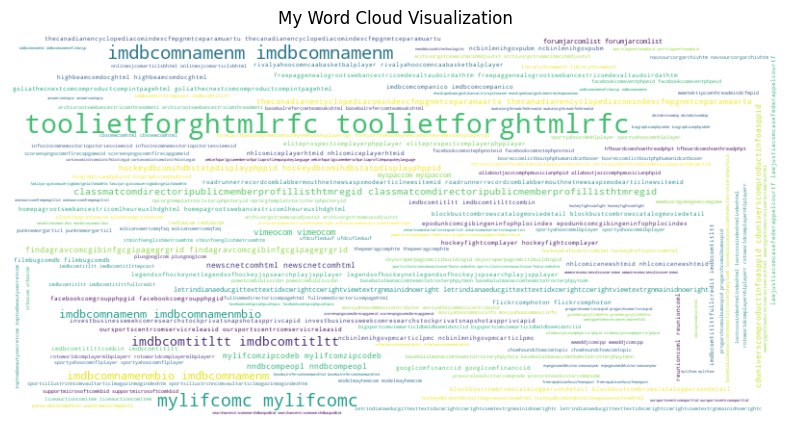

In [48]:
# Assume 'my_text' holds the string data for the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
# 1. Create a figure and set its size (optional, but recommended)
plt.figure(figsize=(10, 5))

# 2. Display the image using imshow(). The wordcloud object itself is a NumPy array/image.
plt.imshow(wordcloud, interpolation='bilinear')

# 3. Turn off the axes (since it's not a standard graph)
plt.axis("off")

# 4. (Optional) Add a title
plt.title("My Word Cloud Visualization")

# 5. Display the plot (Crucial for Jupyter to render the output immediately)
plt.show()

In [49]:
all_text = ' '.join(bad_sites['text'].tolist())

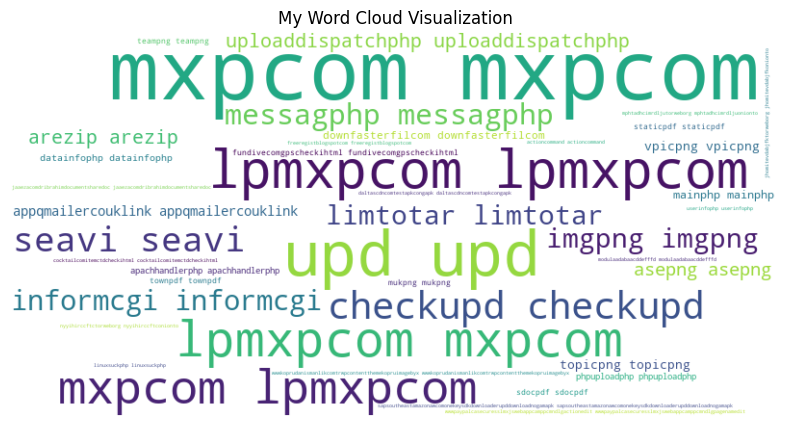

In [50]:
# Assume 'my_text' holds the string data for the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
# 1. Create a figure and set its size (optional, but recommended)
plt.figure(figsize=(10, 5))

# 2. Display the image using imshow(). The wordcloud object itself is a NumPy array/image.
plt.imshow(wordcloud, interpolation='bilinear')

# 3. Turn off the axes (since it's not a standard graph)
plt.axis("off")

# 4. (Optional) Add a title
plt.title("My Word Cloud Visualization")

# 5. Display the plot (Crucial for Jupyter to render the output immediately)
plt.show()

In [51]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobelitffbddcaccefloginskypecomencgibinveriflo...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",wwwdghjdgfcompaypalcoukcycgibinwebscrcmdhomecu...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbicompaypalcgibingetintoherfsecurdisp...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mailprintakidcomwwwonlinamericanexpresscominde...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydregcomwpcontentthemewidescreeninclu...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!pip install sklearn

In [ ]:
!pip install scikit-learn

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
cv = CountVectorizer()

In [57]:
features = cv.fit_transform(df.text)

In [ ]:
featured[:5]

In [59]:
features[:5]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (5, 460927)>

In [60]:
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 460927))

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test,y_train, y_test = train_test_split(features,df.Label, test_size=0.2)

Model Training

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
l_model= LogisticRegression()

In [65]:
l_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
l_model.score(x_test,y_test)

0.7478101312829026

In [67]:
l_model.score(x_train,y_train)

0.7625707205425124

In [68]:
from sklearn.metrics import classification_report

In [69]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(l_model.predict(x_test), y_test, 
                            target_names = ['Bad', 'Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.11      1.00      0.21      4496
        Good       1.00      0.74      0.85    132841

    accuracy                           0.75    137337
   macro avg       0.56      0.87      0.53    137337
weighted avg       0.97      0.75      0.83    137337



In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
con_mat = pd.DataFrame(confusion_matrix(l_model.predict(x_test), y_test),
                       columns = ['Predicted:Bad', 'Predicted:Good'],
                       index = ['Actual:Bad', 'Actual:Good'])

In [ ]:
import seaborn as sns

In [ ]:
!pip install seaborn

In [76]:
import seaborn as sns


CONFUSION MATRIX


<Axes: >

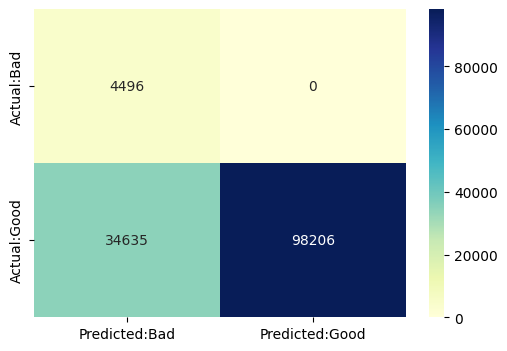

In [77]:
print('\nCONFUSION MATRIX')
plt.figure(figsize=(6,4))
sns.heatmap(con_mat, annot = True, fmt='d', cmap="YlGnBu")

In [78]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
mnb= MultinomialNB()

In [80]:
mnb.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [81]:
mnb.score(x_test,y_test)

0.8490865535143479

Models
# Logistic Regression
# Decision Tree Classifier
# Random Forest Classifier
# Gradient Boosting Classifier
# AdaBoost Classifier
# Support Vector Classifier (RBF Kernel)
# K-Neighbors Classifier
# Naive Bayes (Gaussian)
# MLP Classifier (Neural Network)

In [82]:
import pickle

In [83]:
pickle.dump(l_model, open('phishing.pkl','wb'))

In [84]:
pickle.dump(cv, open('vectorizer.pkl', 'wb'))

In [94]:
pickle.dump(cv, open('phishing_mnb.pkl', 'wb'))

In [87]:
predict_bad=['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',
'fazan-pacir.rs/temp/libraries/ipad',
'www.tubemoviez.exe',
'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']

In [88]:
predict_good=['www.youtube.com/','youtube.com/watch?v=qI0TQl3vdu','www.retailhellunderground.com/','restorevisioncenters.com/html/technology.html']

In [89]:
predict_good = cv.transform(predict_good)

In [90]:
predict_bad = cv.transform(predict_bad)

In [91]:
l_model.predict(predict_good)

array(['good', 'good', 'good', 'good'], dtype=object)

In [92]:
l_model.predict(predict_bad)

array(['bad', 'good', 'bad', 'good'], dtype=object)

In [93]:
mnb.predict(predict_bad)

array(['bad', 'good', 'bad', 'bad'], dtype='<U4')